We are going to perform the Kidney Stone Diagnosis using KNN algorithm.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [10]:
# Kidney Stone Prediction Dataset

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [11]:
# check for missing values
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [12]:
X = train_df.drop(['id','target'], axis=1)
y = train_df['target']

X.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


In [13]:
# Splitting the dataset into train and test set
# 70% training and 30% test
# random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
X_test

,gravity,ph,osmo,cond,urea,calc
176,1.024,5.40,853,29.5,360,7.82
347,1.008,6.88,395,8.1,87,2.03
307,1.011,6.27,443,21.4,124,1.27
299,1.026,6.29,833,29.0,457,8.94
391,1.019,5.56,1107,30.1,550,3.01
...,...,...,...,...,...,...
16,1.010,6.63,408,11.2,224,2.17
31,1.008,6.81,694,17.7,311,1.02
36,1.024,5.51,874,20.0,385,4.74
41,1.021,6.13,907,23.6,448,2.45


We will choose our K from 2 to 50 and we will use the accuracy score to find the best K. <br>
The accuracy score is calculated by the following formula: <br>
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$ <br>
where: <br>
$TP$ = True Positive <br>
$TN$ = True Negative <br>
$FP$ = False Positive <br>
$FN$ = False Negative <br>


In [38]:
K = []
training_scores = []
test_scores = []

for k in range(2, 50):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)

    K.append(k)

    training_scores.append(model.score(X_train, y_train))   # model.score() returns the accuracy of the model
    test_scores.append(model.score(X_test, y_test))

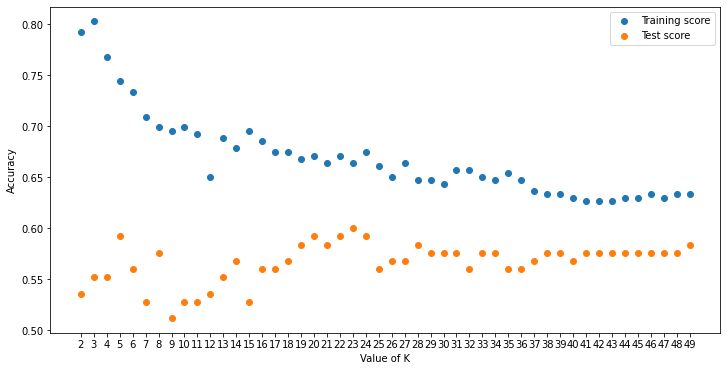

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(K, training_scores, label="Training score")
plt.scatter(K, test_scores, label="Test score")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.xticks(K)
plt.legend()
plt.show()

The accuracy is low. So, let's normalize our data and see if it helps. <br>
The Sklearn library provides a great and easy way to normalize data. <br>
StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1. <br>

In [44]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.08105783, -0.38761849,  2.4970347 ,  0.97405787,  2.54120359,
         2.67835539],
       [ 0.33255349, -0.53400962,  0.9470387 , -0.54722403,  1.76679455,
         1.30259275],
       [ 0.93135697, -0.89185461,  1.25960695,  0.79045488,  0.63496595,
         2.67835539],
       ...,
       [-1.16445521,  0.58832236, -1.83182154, -1.67507095, -1.5989063 ,
        -0.88924727],
       [-1.31415607,  0.75097917, -1.23665733, -1.67507095, -0.89151342,
        -0.90488093],
       [-1.16445521,  0.11661762, -0.71000123, -0.50788053, -0.60111003,
        -0.91426113]])

In [45]:
K = []
training_scores = []
test_scores = []

for k in range(2, 50):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)

    K.append(k)

    training_scores.append(model.score(X_train, y_train))   # model.score() returns the accuracy of the model
    test_scores.append(model.score(X_test, y_test))

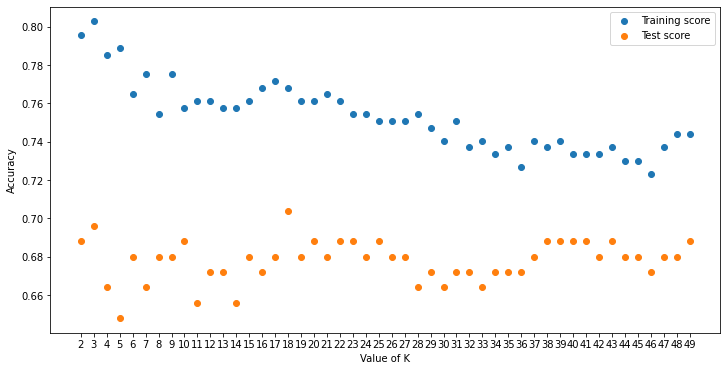

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(K, training_scores, label="Training score")
plt.scatter(K, test_scores, label="Test score")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.xticks(K)
plt.legend()
plt.show()

We can see that the accuracy has improved to some extent after normalization. <br>
Let's experiment using different distance metrics and see if it improves our accuracy. <br>

In [49]:
K = []

# training_scores = (k x 4) matrix, because we have 4 distance metrics
training_scores = np.zeros((48, 4))
test_scores = np.zeros((48, 4))

for k in range(2, 50):
    K.append(k)
    
    model = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    model.fit(X_train, y_train)
    training_scores[k-2, 0] = model.score(X_train, y_train)
    test_scores[k-2, 0] = model.score(X_test, y_test)

    model = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    model.fit(X_train, y_train)
    training_scores[k-2, 1] = model.score(X_train, y_train)
    test_scores[k-2, 1] = model.score(X_test, y_test)

    model = KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    model.fit(X_train, y_train)
    training_scores[k-2, 2] = model.score(X_train, y_train)
    test_scores[k-2, 2] = model.score(X_test, y_test)

    model = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    model.fit(X_train, y_train)
    training_scores[k-2, 3] = model.score(X_train, y_train)
    test_scores[k-2, 3] = model.score(X_test, y_test)

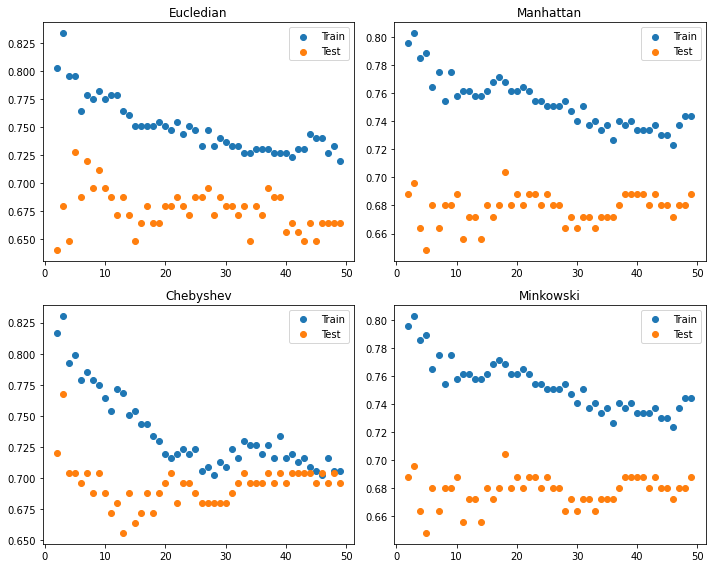

In [50]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot data in each subplot
axes[0, 0].scatter(K, training_scores[:, 0], label='Train')
axes[0, 0].scatter(K, test_scores[:, 0], label='Test')

axes[0, 1].scatter(K, training_scores[:, 1], label='Train')
axes[0, 1].scatter(K, test_scores[:, 1], label='Test')

axes[1, 0].scatter(K, training_scores[:, 2], label='Train')
axes[1, 0].scatter(K, test_scores[:, 2], label='Test')

axes[1, 1].scatter(K, training_scores[:, 3], label='Train')
axes[1, 1].scatter(K, test_scores[:, 3], label='Test')

# Set titles and labels
axes[0, 0].set_title('Eucledian')
axes[0, 1].set_title('Manhattan')
axes[1, 0].set_title('Chebyshev')
axes[1, 1].set_title('Minkowski')

# Add legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

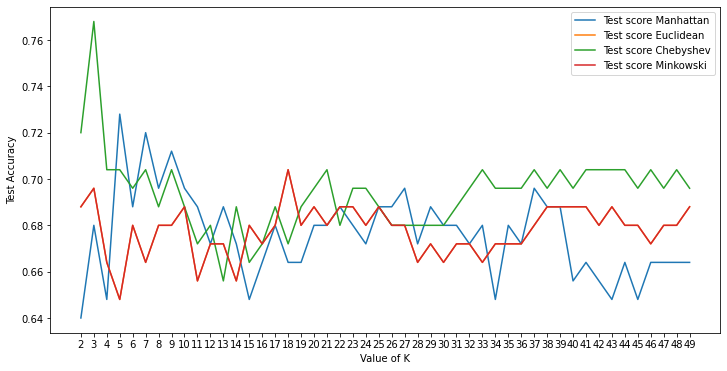

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(K, test_scores[:, 0], label="Test score Manhattan")
plt.plot(K, test_scores[:, 1], label="Test score Euclidean")
plt.plot(K, test_scores[:, 2], label="Test score Chebyshev")
plt.plot(K, test_scores[:, 3], label="Test score Minkowski")
plt.xlabel("Value of K")
plt.ylabel("Test Accuracy")
plt.xticks(K)
plt.legend()